# Zadanie

Napisz algorytm k-mean w wersji Lloyd (klasyczny). Nie można używać żadnych funkcji z k-means w pythonie. 

  * wszysko piszemy ręcznie
  * uzupełnij implementację poniższej klasy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

class kmeans(object):

    def __init__(self):
        self.labels = None
        self.max_iter = None
        self.n_clusters = None
        self.cluster_centers = None

    def fit(self, X, n_clusters, max_iter):
        self.max_iter = max_iter
        self.n_clusters = n_clusters
        self.cluster_centers = X[np.random.permutation(X.shape[0])[:self.n_clusters]]
        for _ in range(self.max_iter):
            self.labels = [self.nearest(x) for x in X]
            indices = [[i for i, l in enumerate(self.labels) if l == j]
                       for j in range(self.n_clusters)]
            X_by_cluster = [X[i] for i in indices]
            self.cluster_centers = [c.sum(axis=0) / len(c) for c in X_by_cluster]
        return self

    def distance(self, a, b):
        return np.sqrt(((a - b) ** 2).sum())

    def nearest(self, x):
        return np.argmin([self.distance(x, c) for c in self.cluster_centers])


# Zadanie

Sprawdż działanie napisanego algorytmu na poniższych danych.

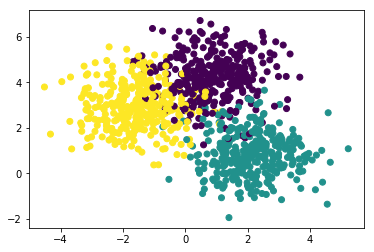

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)
n_classes = len(set(y_blobs))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs)
plt.show()

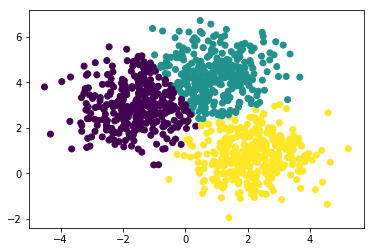

In [3]:
km = kmeans()
km.fit(X_blobs,3,20)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=km.labels)
plt.show()

# Zadanie

Wykonaj algorytm k-means (własny) na zbiorze iris (dwie wybrane współrzędne). 
 

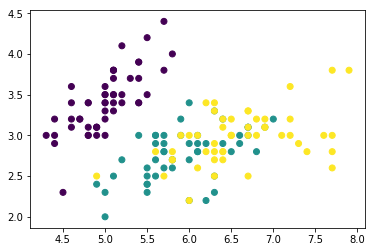

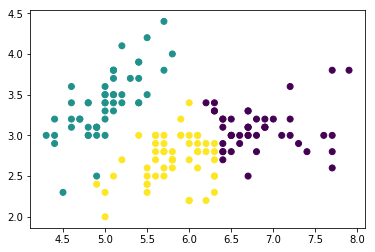

In [5]:
from sklearn import datasets
iris = datasets.load_iris()

km = kmeans()
km.fit(iris.data[:, :2],3,20)

plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.show()

plt.scatter(iris.data[:, 0], iris.data[:, 1], c=km.labels)
plt.show()

# Zadanie 
Predykcji można dokonać dla dowolnego punktu na płaszczyźnie. Wygeneruj punkty równomiernie na kwadracie zawierającym punkty i wykonaj dla nich predykcję.


Oryginalny zbiór danych niech będzie pokolorowany za pomocą oryginalnych klas. Narysuj wszystko na jednym wykresie.

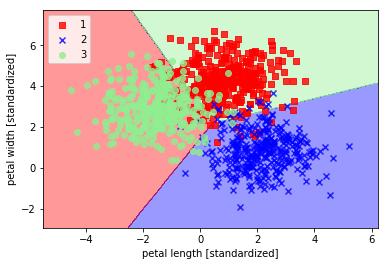